This notebook is used the Stack Overflow Annual Developer Survey in 2020 (https://insights.stackoverflow.com/survey)
The purpose of this notebook is to define and anwser 3 real world questions that are different than the example blog post from Josh Bernhard (https://medium.com/@josh_2774/how-do-you-become-a-developer-5ef1c1c68711), which used 2017 data. Josh questions as below
      How to break into the field ?
      How do the different method related to salary and job satisfaction ?
      What biases did the respondents have in suggesting different methods ?
My plan for this notebook is to answer the below questions about United State Developers:
       What company type offer the highest pay ?
       what is the relationship of working remotely and salary ?
       Does big companies offer higher salary for the same job ?
       What are the top 3 skills for hardward and software engineers ?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# control font
sns.set_context('talk')

df = pd.read_csv('./survey_results_public.csv')
pd.set_option("max_columns", None)
#pd.set_option("max_colwidth", None)
df.head(5)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [3]:
# get usa data frame
dfUSA = df.loc[df['Country']=="United States",  ['Salary', 'HomeRemote','CompanyType','YearsProgram', 'FormalEducation','EmploymentStatus','MajorUndergrad']]
dfUSA = dfUSA.dropna()
dfUSA.head()

,Salary,HomeRemote,CompanyType,YearsProgram,FormalEducation,EmploymentStatus,MajorUndergrad
17,130000.0,All or almost all the time (I'm full-time remote),Publicly-traded corporation,20 or more years,Bachelor's degree,Employed full-time,Computer science or software engineering
18,82500.0,A few days each month,Publicly-traded corporation,2 to 3 years,Bachelor's degree,Employed full-time,Computer science or software engineering
25,175000.0,"Less than half the time, but at least one day ...",Publicly-traded corporation,20 or more years,Master's degree,Employed full-time,Computer science or software engineering
70,65000.0,A few days each month,"Privately-held limited company, not in startup...",2 to 3 years,Some college/university study without earning ...,Employed full-time,"Information technology, networking, or system ..."
72,120000.0,All or almost all the time (I'm full-time remote),Venture-funded startup,20 or more years,Some college/university study without earning ...,Employed full-time,Computer science or software engineering


# What company type offer the highest pay?

In [4]:
# clean up
serExclude = ["I don't know","I prefer not to answer","Something else"]
dfValidCompanies = dfUSA[~dfUSA['CompanyType'].isin(serExclude)]
dfCompanies = dfValidCompanies.groupby("CompanyType")['Salary'].max().sort_values(ascending=False)
dfCompanies.head()

CompanyType
Privately-held limited company, not in startup mode                      197000.0
Venture-funded startup                                                   195000.0
Publicly-traded corporation                                              195000.0
Pre-series A startup                                                     195000.0
Non-profit/non-governmental organization or private school/university    185000.0
Name: Salary, dtype: float64

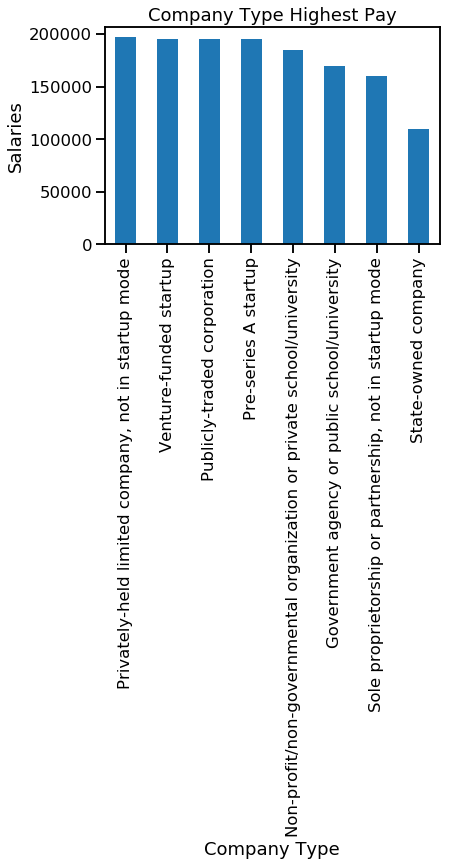

In [5]:
dfCompanies.plot(kind='bar',x='CompanyType',y='Salary')

plt.ylabel('Salaries')
plt.xlabel('Company Type')
plt.title('Company Type Highest Pay')
plt.show()

# what is the relationship of working remotely and salary?

In [6]:
dfRemote = dfUSA.loc[dfUSA['HomeRemote'] != "Never",['HomeRemote','Salary']]
dfRemote = dfRemote.groupby("HomeRemote")['Salary'].mean().sort_values(ascending=False)
dfRemote.head(5)



HomeRemote
All or almost all the time (I'm full-time remote)          108308.364506
Less than half the time, but at least one day each week    103085.675159
About half the time                                        100649.310000
More than half, but not all, the time                      100549.927835
A few days each month                                       97757.681565
Name: Salary, dtype: float64

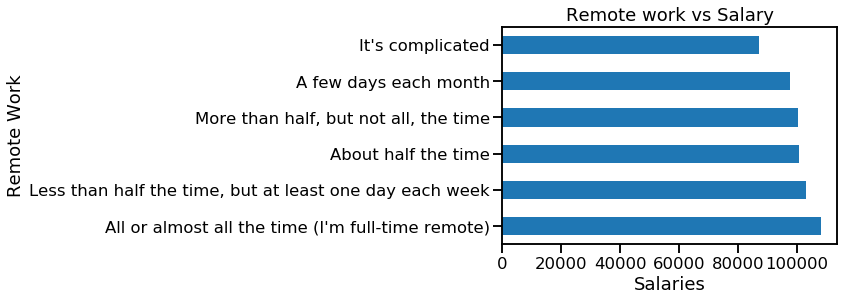

In [7]:

dfRemote.plot(kind='barh',x='HomeRemote',y='Salary')
plt.xlabel('Salaries')
plt.ylabel('Remote Work')
plt.title('Remote work vs Salary')
plt.show()


In [8]:
# Clustered Bar Chart by Company type and experience



In [9]:
# get the exoerience information
# group by company and experience then get the avg salary
# unstack the results to move the experience as columns to create the series
experience = dfValidCompanies.groupby(["CompanyType","YearsProgram"])['Salary'].mean().rename("Salary").sort_values(ascending=False).sort_index().unstack()
experience.head()


YearsProgram,1 to 2 years,10 to 11 years,11 to 12 years,12 to 13 years,13 to 14 years,14 to 15 years,15 to 16 years,16 to 17 years,17 to 18 years,18 to 19 years,19 to 20 years,2 to 3 years,20 or more years,3 to 4 years,4 to 5 years,5 to 6 years,6 to 7 years,7 to 8 years,8 to 9 years,9 to 10 years,Less than a year
CompanyType,,,,,,,,,,,,,,,,,,,,,
Government agency or public school/university,68000.000000,48477.750000,73300.000000,79107.142857,76000.000000,77038.181818,79400.000000,83440.000000,93762.333333,82000.000000,68822.500000,51004.000000,91156.000000,67187.500000,61484.333333,58950.000000,69831.000000,53142.857143,68000.000000,63463.157895,50000.0
Non-profit/non-governmental organization or private school/university,36500.000000,76150.000000,91357.142857,69500.000000,86600.000000,72537.500000,72800.000000,104800.000000,105187.500000,110000.000000,105041.666667,57000.000000,102526.361702,55132.000000,65388.888889,63333.333333,87000.000000,81880.000000,81600.000000,66200.000000,NaN
Pre-series A startup,72400.000000,79166.666667,70000.000000,80000.000000,80000.000000,102500.000000,115000.000000,115000.000000,105500.000000,80000.000000,110000.000000,57000.000000,119562.500000,100500.000000,93000.000000,67250.000000,72571.428571,90000.000000,110000.000000,74333.333333,NaN
"Privately-held limited company, not in startup mode",68337.037037,87686.274510,94601.447368,86003.585366,89205.263158,102507.415385,97765.584906,100608.571429,97933.736842,100869.608696,109534.146341,67335.897436,116519.450689,68661.309707,69973.076923,75187.666667,77195.535714,81321.568627,75790.839286,81564.243902,62625.0
Publicly-traded corporation,91927.272727,101196.953488,105486.842105,106951.638889,115265.517241,104248.070175,112861.363636,108690.322581,122888.975610,115875.583333,122363.888889,77788.888889,126146.618619,80637.837838,81014.893617,82141.379310,94935.930233,92380.487805,93521.404762,96521.968254,57500.0


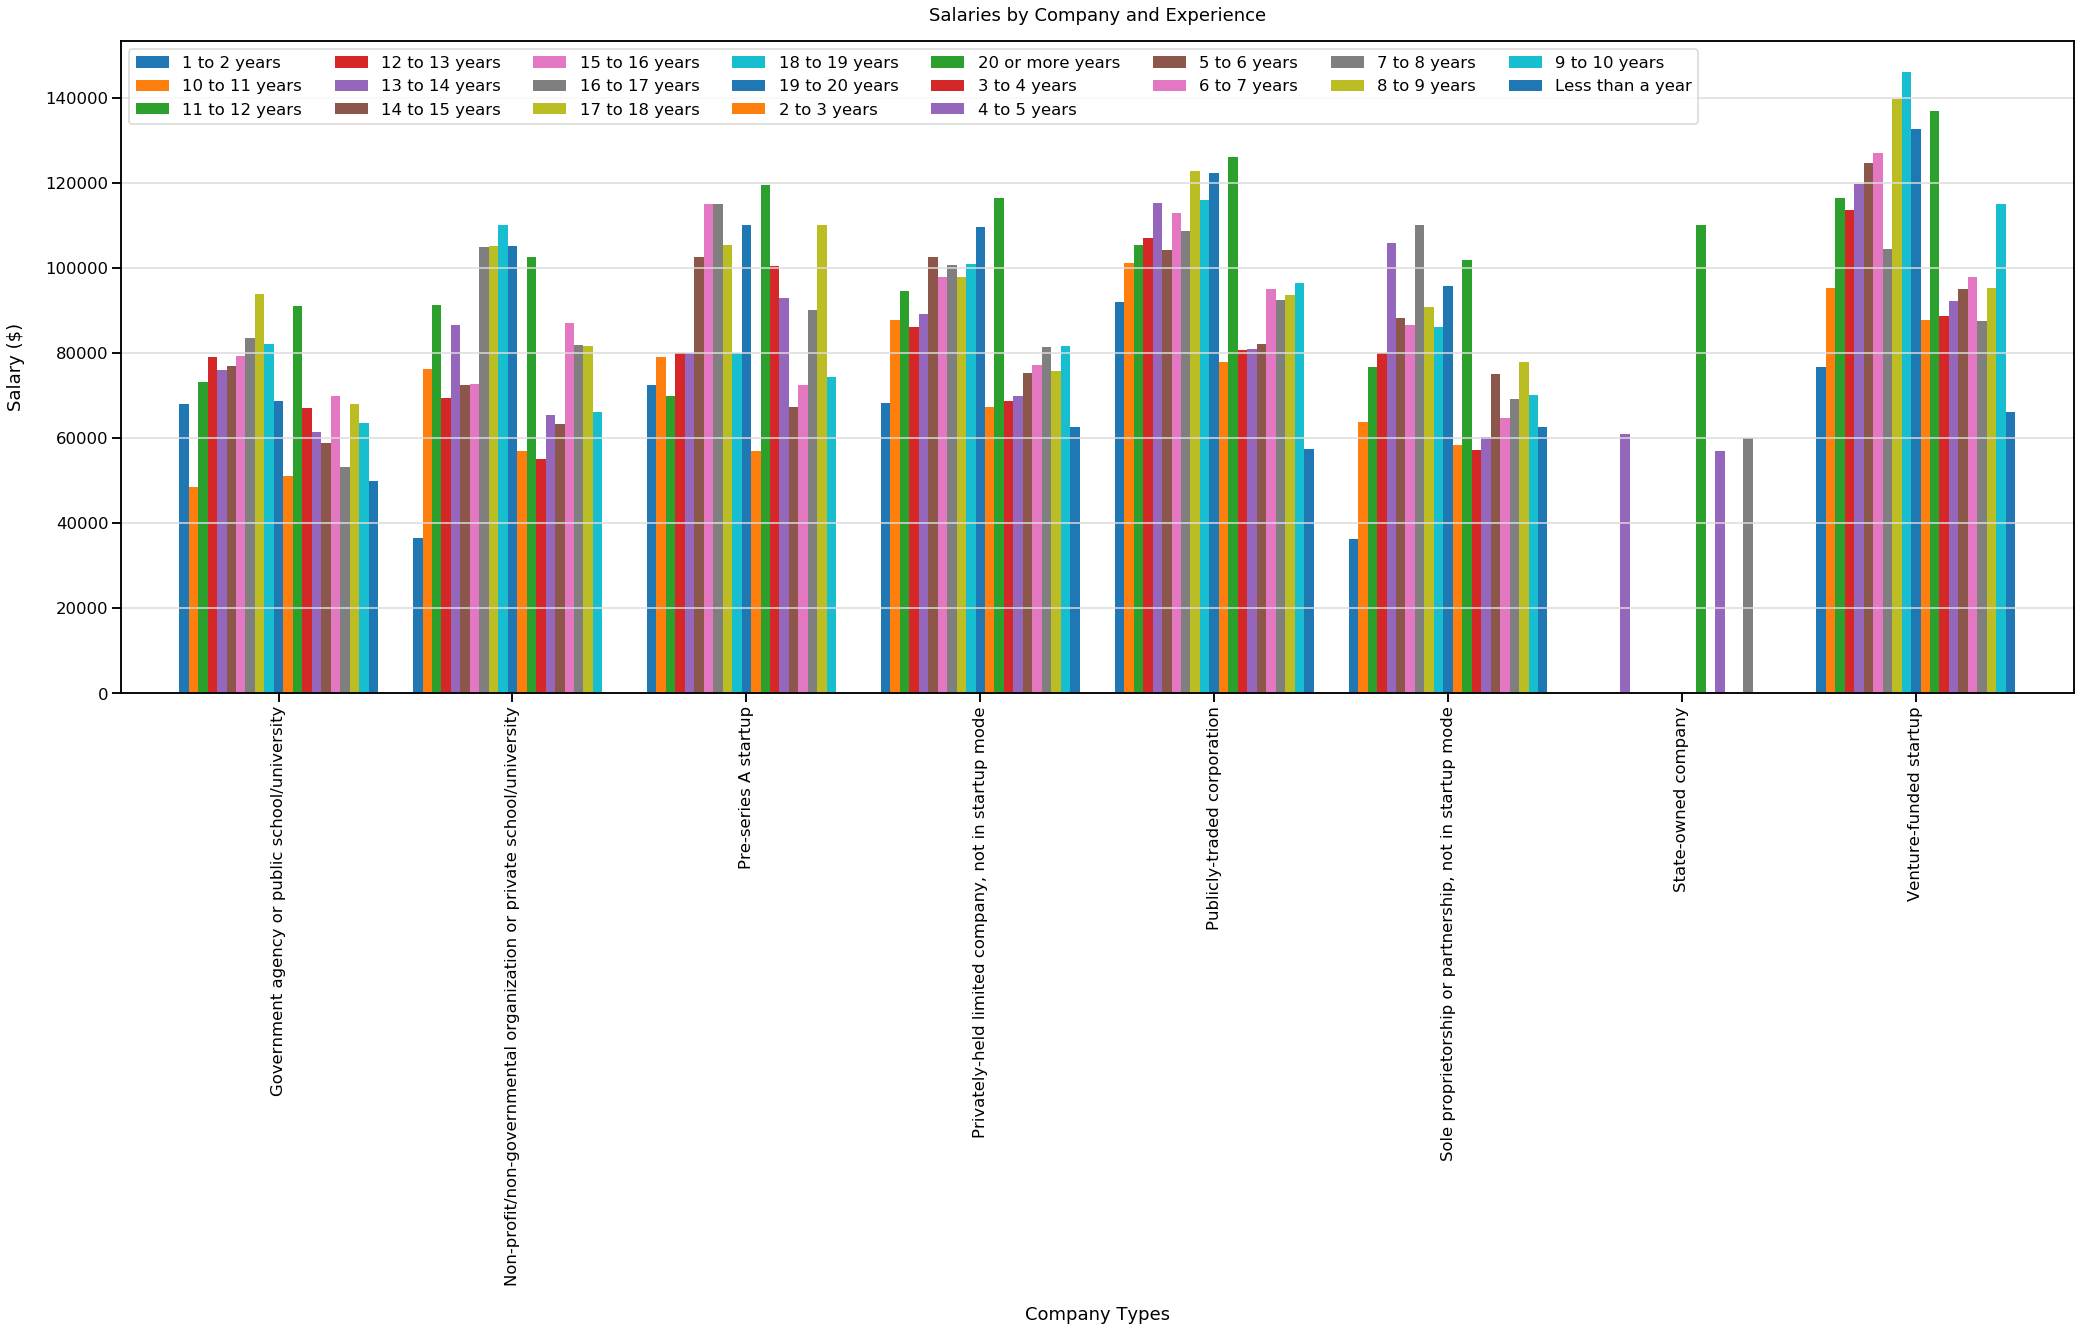

In [17]:
# create the clustered chart
sns.set_context('talk')
plot = experience.plot.bar(figsize=(35, 12), width=.85)
plot.legend(loc="upper left",ncol=len(experience))
plot.set_xlabel('Company Types', labelpad=20)
plot.set_ylabel('Salary ($)', labelpad=20)
plot.set_title('Salaries by Company and Experience', pad=20)
plot.yaxis.grid(True, color='#DCDCDC')
plot.xaxis.grid(False)


# Computer vs non-computer related salaries


In [11]:

# for each row, check of the MajorUndergrad is computer related
def isComputerRelated(row):
    value = row["MajorUndergrad"].lower()
    return "Computer" if value.find("computer") > -1  else "Non-Computer"

dfCompRelated = dfUSA[["Salary","MajorUndergrad"]].copy()
dfCompRelated["ComputerRelated"] = dfCompRelated.apply(isComputerRelated, axis=1)  #apply function to each row
compRelAvg = dfCompRelated.groupby("ComputerRelated")['Salary'].mean().sort_values(ascending=False)
compRelAvg.head()

ComputerRelated
Computer        97155.201709
Non-Computer    95405.282739
Name: Salary, dtype: float64

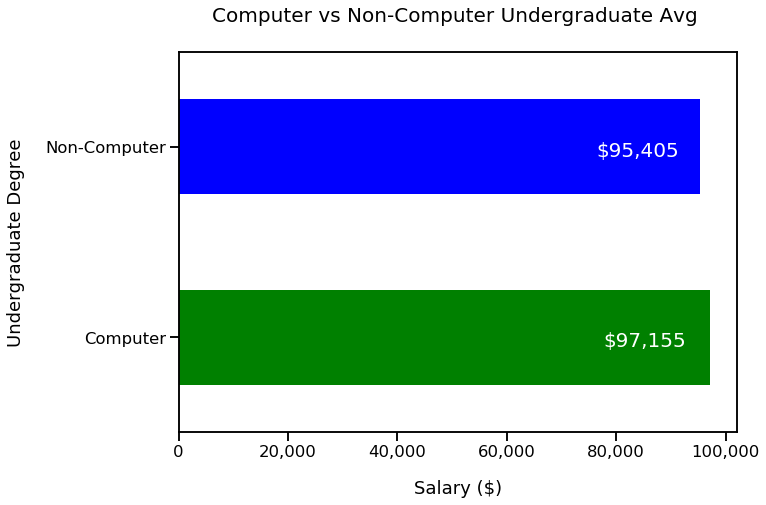

In [15]:
# horizontal bar chart with colors
plot = compRelAvg.plot(kind='barh', figsize=(10, 7), color=['g','b'])

# set the axis and title labels
plot.set_ylabel('Undergraduate Degree', labelpad=20)
plot.set_xlabel('Salary ($)', labelpad=20)
plot.set_title('Computer vs Non-Computer Undergraduate Avg ', pad=30, fontsize=20)
plot.set_xticklabels(['{:,.0f}'.format(v) for v in plot.get_xticks()])  # format the x series

# annotate the bars with the total amount
for p in plot.patches:
    b = p.get_bbox()        
    value = "${:,.0f}".format(b.x1)
    # plot.annotate(str(value), (b.x1, b.y1 + -.2 ), fontsize=20)
    plot.text(b.x1 * .80, p.get_y()+ .2,str(value), fontsize=20, color='#ffffff')   # add a value at the end of the bar

